# Кластеризация в Python: иерархическая

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA # Метод главных компонент
from sklearn import preprocessing  # функция для предварительной обработки данных
from sklearn.cluster import AgglomerativeClustering # Кластеризация иерархическим методом
from sklearn.metrics import silhouette_score # Метрика силуэта
import matplotlib.pyplot as plt  #импотируем подбиблиотеку и даём ей имя
import matplotlib    # для рисования

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Задачи/Labour.csv')

Основные переменные в датафрейме `df` (данные по бельгийским фирмам за 1996 г.)
- `capital`:капитал (в млн евро)
- `labour`: число сотрудников
- `output`: выпуск (в млн евро)
- `wage`: зарплата на одного сотрудника (в тыс евро)

In [4]:
df.head(n=6)

,capital,labour,output,wage
0,2.606563,184,9.250759,43.080307
1,1.323237,91,3.664310,27.780016
2,22.093692,426,28.781516,44.467748
3,10.737851,72,4.124642,39.734710
4,1.161365,46,2.890150,34.650709
5,276.796701,7642,480.140372,48.939782


In [5]:
# Нормализация данных
scaler=preprocessing.StandardScaler().fit(df)  # специфицируем нормализацию данных
data_rescaled=scaler.transform(df)  # применяем эту нормализацию к исходноыму датасету

## Иерархическая кластеризация: заданное количество кластеров
Вначале разобьём датасет на заданное число кластеров (например, на 4). Рассмотрим **евклидову метрику между объектами**

In [6]:
# Создаём объект класса AgglomerativeClustering с нужными параметрами
# affinity= “euclidean”, “l1”, “l2”, “manhattan”, “cosine”
hier = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
# применяем метод .fit() для кластеризации данных
hier.fit(data_rescaled)
# кластерная переменная
print(hier.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[2 1 2 1 1 0 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1
 2 1 1 2 1 1 2 2 2 2 1 2 2 1 2 2 0 2 0 1 1 1 1 1 2 2 2 1 2 1 1 1 2 1 2 1 2
 1 1 1 2 1 1 2 1 1 2 2 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 2 1 2 1 1
 2 2 1 2 1 1 2 1 2 1 1 1 1 1 2 1 1 0 1 1 1 2 1 1 2 2 1 1 2 1 2 2 1 2 1 2 1
 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 2 1 1
 1 1 0 2 1 2 1 1 2 2 2 1 1 1 1 1 2 2 1 2 2 2 1 2 1 1 2 1 1 1 1 2 2 1 1 2 2
 2 1 2 1 2 1 1 1 2 1 2 2 1 1 1 1 2 1 2 1 1 1 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 2 2 2 1 2 0 1 2 2 2 1 2 1
 1 2 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 2 2 2 1 1 2 1 1 1 2 1 2
 1 1 2 1 2 2 1 2 1 2 0 1 2 2 1 1 1 1 2 1 2 2 1 1 1 1 3 2 2 1 1 1 1 1 2 1 1
 1 1 2 1 2 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 2 2 2 1 1 2 1 2 2 1 1 1 1 2 2 2 1
 2 2 1 2 2 1 1 1 1 2 2 1 1 1 0 1 1 1 2 2 1 2 1 2 2 2 1 1 1 1 1 1 2 1 2 1 1
 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1
 2 1 2 2 2 1 2 1 1 1 1 2 

<Axes: xlabel='capital', ylabel='output'>

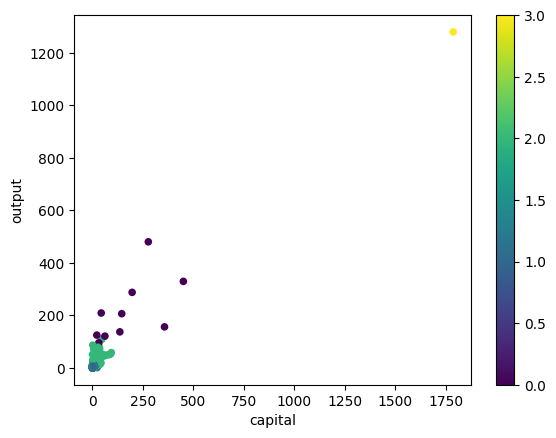

In [7]:
# визуализируем в исходных переменных
df.plot.scatter('capital', 'output', c=hier.labels_, colormap='viridis')

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

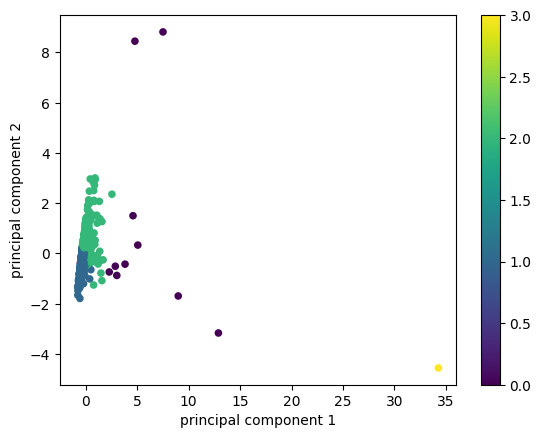

In [8]:
# Визуализация в главных компонентых
pca=PCA(n_components=2)
pca.fit(data_rescaled)
data_pca = pca.transform(data_rescaled)
df_pca = pd.DataFrame(data=data_pca, columns = ['principal component 1', 'principal component 2'])
df_pca.plot.scatter('principal component 1', 'principal component 2', c=hier.labels_, colormap='viridis')

Построим дендрограмму

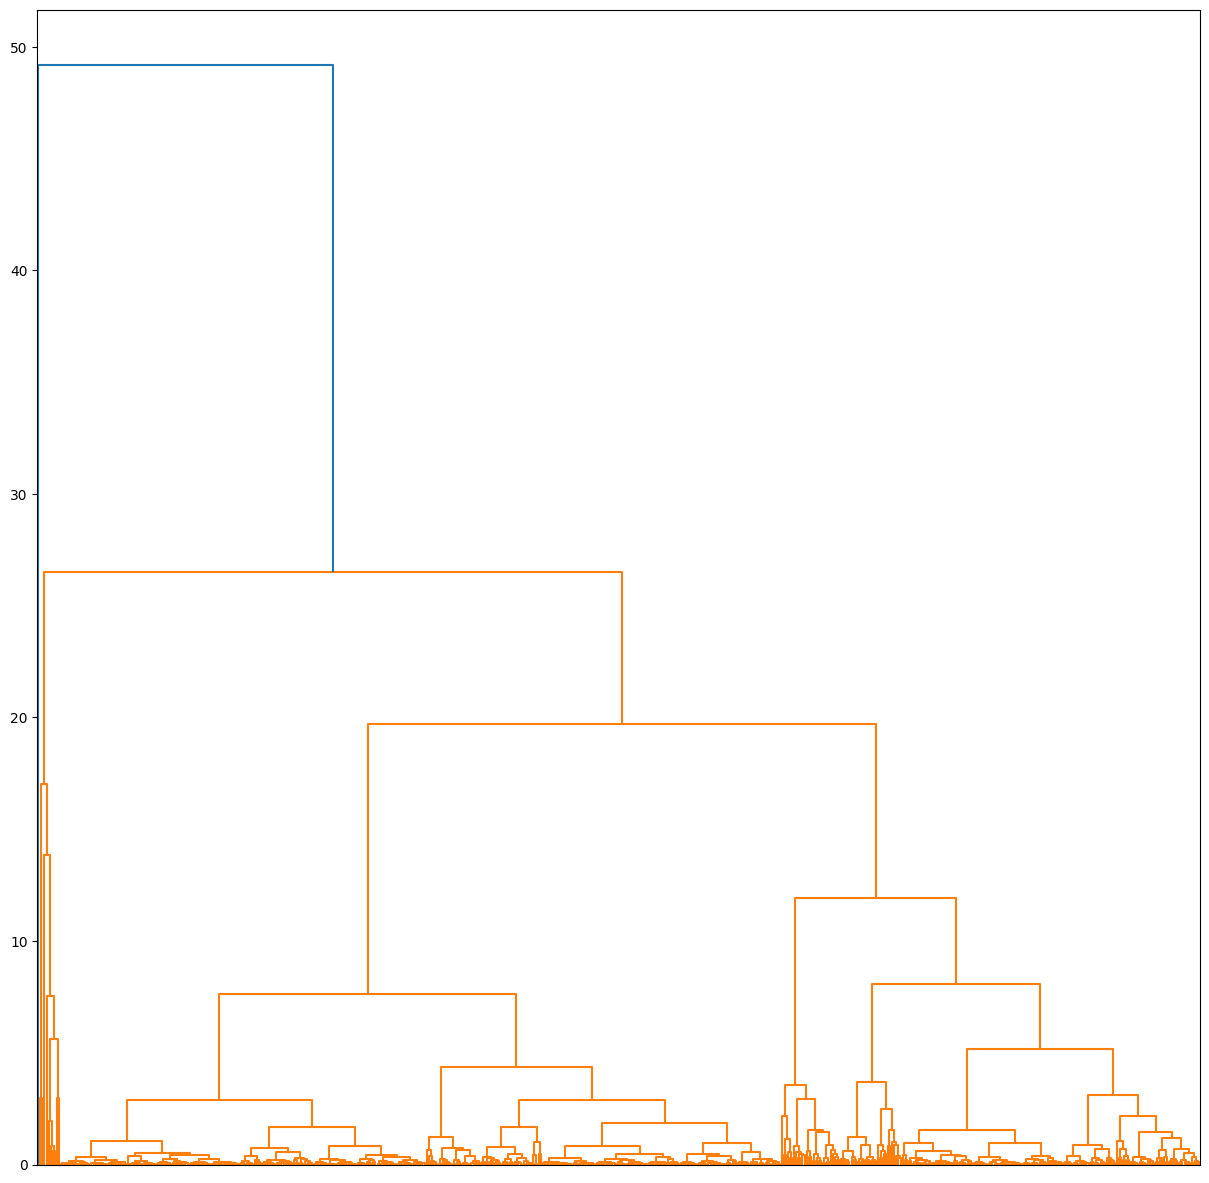

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(data_rescaled, method='ward')

plt.figure(figsize=(15, 15))  # размер картинки

dendrogram(mergings, no_labels=True)

plt.show()

## Оптимальное количество кластеров
Метод силуэта для евклидова расстояния

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

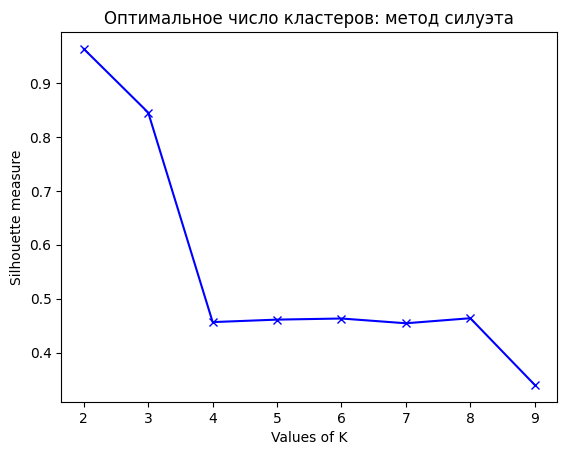

In [10]:
Silhouette_measure = []  # создаем массив длины 0
K = range(2,10)          #какие значения  k рассматриваеются
for num_clusters in K :
    hier = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean')
    hier.fit(data_rescaled)
    Silhouette_measure.append(silhouette_score(data_rescaled, hier.labels_))
plt.plot(K,Silhouette_measure,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette measure')
plt.title('Оптимальное число кластеров: метод силуэта')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

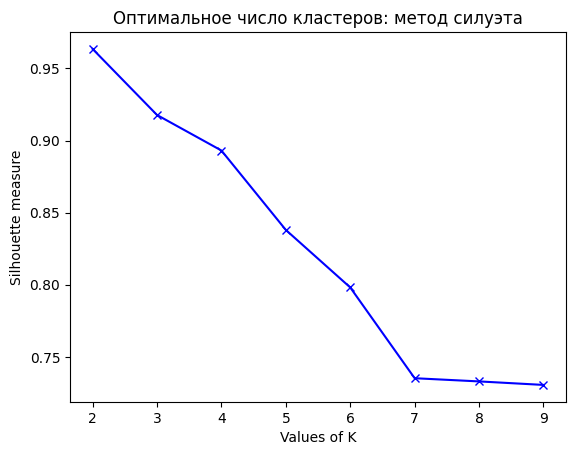

In [11]:
Silhouette_measure = []  # создаем массив длины 0
K = range(2,10)          #какие значения  k рассматриваеются
for num_clusters in K :
    hier = AgglomerativeClustering(n_clusters=num_clusters, affinity='manhattan', linkage='average')
    hier.fit(data_rescaled)
    Silhouette_measure.append(silhouette_score(data_rescaled, hier.labels_))
plt.plot(K,Silhouette_measure,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette measure')
plt.title('Оптимальное число кластеров: метод силуэта')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

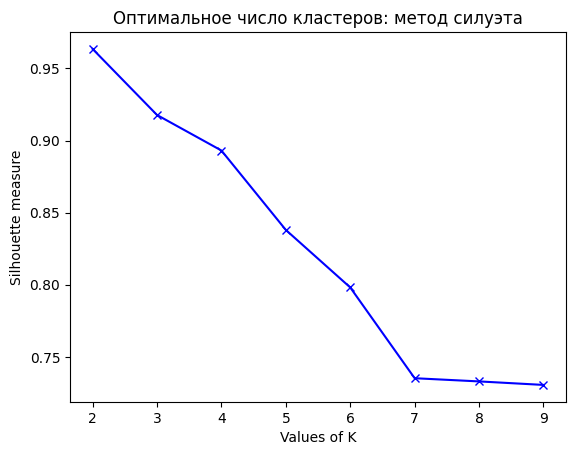

In [12]:
Silhouette_measure = []  # создаем массив длины 0
K = range(2,10)          #какие значения  k рассматриваеются
for num_clusters in K :
    hier = AgglomerativeClustering(n_clusters=num_clusters, affinity='l1', linkage='average')
    hier.fit(data_rescaled)
    Silhouette_measure.append(silhouette_score(data_rescaled, hier.labels_))
plt.plot(K,Silhouette_measure,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette measure')
plt.title('Оптимальное число кластеров: метод силуэта')
plt.show()